In [1]:
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import colors, cm
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
df_wkly_grid = pd.read_csv('/mnt/c/Users/Sean.Kearney/OneDrive - USDA/Documents/Projects/GPS_v_hetgen/data/pred_all_gridded.csv')

In [3]:
df_wkly_grid

,Unnamed: 0,UTM_X,UTM_Y,Pasture,week,season_str,Year,Biomass,CP,dFence,...,mod_data,grazing_wkly_sum,grazing_rel_freq,grz_lag_avg,ID,pred_z,pred_secs,pred_rel,pred_rel2,pred_rel_bins
0,1,522465,4518015,24W,20,early,2016,-0.768474,0.526282,-1.323381,...,test,291630.492268,3.345165,1,522465_4518015,0.168103,364.901843,1.046716,1.046716,6
1,2,522465,4518045,24W,20,early,2016,-0.530901,0.360928,-1.323381,...,test,291630.492268,2.480188,1,522465_4518045,0.086747,529.930142,1.520098,1.520098,8
2,3,522465,4518075,24W,20,early,2016,-0.702992,0.515582,-1.323381,...,test,291630.492268,4.580846,1,522465_4518075,0.052627,662.603853,1.900670,1.900670,9
3,4,522465,4518105,24W,20,early,2016,-0.898906,0.235783,-1.323381,...,test,291630.492268,4.622035,1,522465_4518105,0.176049,361.377713,1.036607,1.036607,6
4,5,522465,4518135,24W,20,early,2016,-1.129304,0.409303,-1.323381,...,test,291630.492268,4.057152,1,522465_4518135,0.102433,491.613856,1.410188,1.410188,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491469,491470,525465,4522665,7NW,32,mid,2018,0.392251,0.249400,-1.319041,...,train,291630.492268,3.107438,1,525465_4522665,0.472208,295.925368,1.533429,1.533429,8
491470,491471,525465,4522695,7NW,32,mid,2018,0.091260,-0.486713,-1.207433,...,train,291630.492268,12.009977,1,525465_4522695,0.462668,287.592865,1.490252,1.490252,8
491471,491472,525465,4522725,7NW,32,mid,2018,-0.354878,-0.964879,-1.319041,...,train,291630.492268,4.126896,1,525465_4522725,0.154236,1060.707361,5.496385,5.496385,9
491472,491473,525495,4522695,7NW,32,mid,2018,-0.478998,-0.954334,-1.319041,...,train,291630.492268,9.714834,1,525495_4522695,0.449247,235.986012,1.222835,1.222835,7


In [4]:
(df_wkly_grid['pred_rel'] == 0).sum()

4944

In [5]:
#df_wkly_grid.groupby(['Year', 'Pasture', 'week', 'UTM_X', 'UTM_Y'])['pred_rel'].transform(lambda x: x / x.mean())

In [6]:
df_wkly_grid.Pasture.unique()

array(['24W', '17N', '19N', '20SE', '26E', '31E', '5E', '7NW', '15E',
       '25SE'], dtype=object)

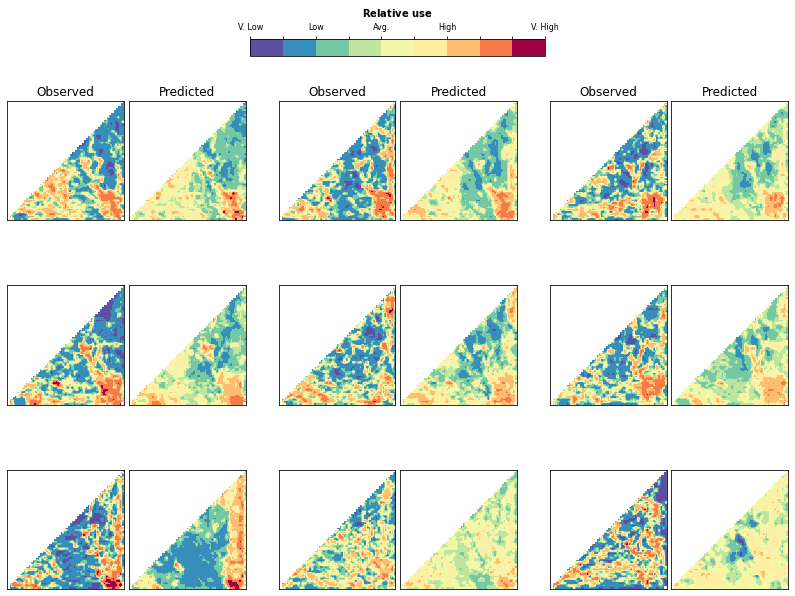

In [7]:
xr_dat_past = df_wkly_grid[df_wkly_grid['Pasture'] == '20SE'].groupby(['Year', 'season_str',
                                                                        'UTM_Y', 'UTM_X']).mean().to_xarray()

# create cmap for observed
rel_use_breaks = [0, 0.05, 0.5, 0.75, 0.9, 1.1, 1.5, 2.5, 5.0, 1000]
rel_use_labels = ['V. Low', '', 'Low', '', 'Avg.', '', 'High', '', '', 'V. High']
rel_use_cmap = cm.get_cmap('Spectral_r', len(rel_use_breaks))
cmap_rel_use = colors.LinearSegmentedColormap.from_list(
            'Relative use', [rel_use_cmap(i) for i in np.arange(len(rel_use_labels))],
    N=len(rel_use_labels))
norm_rel_use = colors.BoundaryNorm(rel_use_breaks, len(rel_use_breaks))

# create legend patches
res_use_patches =[mpatches.Patch(color=rel_use_cmap(i), 
                                   label=rel_use_labels[i]) for i in np.arange(len(rel_use_labels))]
yr = 2016
xr_dat_early = xr_dat_past.sel(Year=yr, season_str='early')
xr_dat_mid = xr_dat_past.sel(Year=yr, season_str='mid')
xr_dat_late = xr_dat_past.sel(Year=yr, season_str='late')

cax_fsize=8
cax_title_fsize=10
cax_pad=0.10

fig = plt.figure(figsize=(14, 24))

gs1 = GridSpec(4, 8,
               height_ratios=[0.1, 0.9, 0.9, 0.9], 
               width_ratios=[1.0, 1.0, 0.2, 1.0, 1.0, 0.2, 1.0, 1.0],
               top=0.98, bottom=0.65, wspace=0.05)
ax0 = fig.add_subplot(gs1[0, 2:6])
ax_dict = {}
for idx_yr, yr in enumerate([2016, 2017, 2018]):
    ax_dict[yr] = {}
    for idx_seas, seas in enumerate(['early', 'mid', 'late']):
        ax_dict[yr][seas] = {}
        for idx_var, var in enumerate(['grazing_rel_freq', 'pred_rel']):
            ax_dict[yr][seas][var] = fig.add_subplot(gs1[idx_yr + 1, idx_seas *3 + idx_var])
            im = ax_dict[yr][seas][var].imshow(xr_dat_past.sel(Year=yr, season_str=seas)[var].sortby('UTM_Y', ascending=False).data, 
                     cmap=cmap_rel_use, norm=norm_rel_use)

cbar = fig.colorbar(im, cax=ax0, orientation='horizontal', aspect=10)
ax0.xaxis.set_ticks_position('top')
ax0.set_title("$\\bf{Relative\ use}$", fontsize=10)
cbar.ax.tick_params(labelsize=8)
cbar.ax.set_xticklabels(rel_use_labels)

for yr in ax_dict:
    for seas in ax_dict[yr]:
        for var in ax_dict[yr][seas]:
            ax = ax_dict[yr][seas][var]
            ax.tick_params(left=False,
                           bottom=False,
                           labelleft=False,
                           labelbottom=False)  
            if yr == 2016 and var == 'grazing_rel_freq':
                ax.set_title('Observed')
            elif yr == 2016 and var == 'pred_rel':
                ax.set_title('Predicted')

In [8]:
import seaborn as sns

In [15]:
df_wkly_grid2 = df_wkly_grid.copy()
df_wkly_grid2['week'] = pd.Categorical(df_wkly_grid['week'].astype('str'), 
                                       categories=df_wkly_grid['week'].astype('str').unique().sort(),
                                       ordered=True)

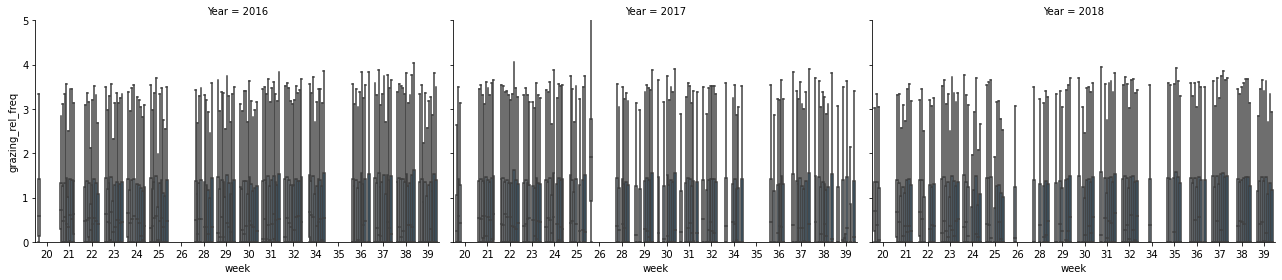

In [24]:
g = sns.FacetGrid(data=df_wkly_grid2, col='Year', height=4, aspect=1.5)
p = g.map_dataframe(sns.boxplot, x='week', y='grazing_rel_freq', hue='Pasture', fliersize=0)
for ax in p.axes.flatten():
    ax.set_ylim(0, 5)

In [44]:
df_wkly_grid['grazing_wkly_sum']

0         291630.492268
1         291630.492268
2         291630.492268
3         291630.492268
4         291630.492268
              ...      
491469    291630.492268
491470    291630.492268
491471    291630.492268
491472    291630.492268
491473    291630.492268
Name: grazing_wkly_sum, Length: 491474, dtype: float64

In [49]:
xr_dat_test = df_wkly_grid[(df_wkly_grid['Pasture'] == '15E') &
                           (df_wkly_grid['Year'] == 2017) &
                           (df_wkly_grid['week'] == 24)].groupby(['UTM_Y', 'UTM_X']).mean().to_xarray()

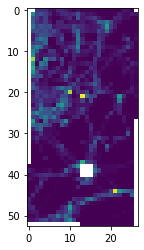

<AxesSubplot:>

In [50]:
from rasterio.plot import show
show(xr_dat_test['grazing_rel_freq'].data)

In [41]:
with pd.option_context('display.max_rows', 400):
    display(df_wkly_grid.groupby(['Year', 'Pasture', 'week'])['grazing_secs'].sum())

Year  Pasture  week
2016  15E      22      298950
               23      332950
               24      197137
               25      185308
               28      174957
               29      178532
               30      167621
               31      182714
               32      173548
               34      181877
               37      418007
               38      376714
               39      320302
      17N      21      373321
               22      402811
               23      374354
               24      351892
               25      325816
               28      303303
               29      327545
               30      358872
               31      398676
               32      389656
               34      369419
               36      339098
               37      334205
               38      341944
               39      266398
      19N      21      331871
               22      342608
               23      350255
               24      344468
               25   

[Text(1, 1, 'V. Low'),
 Text(2, 1, ''),
 Text(3, 1, 'Low'),
 Text(4, 1, ''),
 Text(5, 1, 'Avg.'),
 Text(6, 1, ''),
 Text(7, 1, 'Hi'),
 Text(8, 1, ''),
 Text(9, 1, ''),
 Text(10, 1, 'V. Hi')]

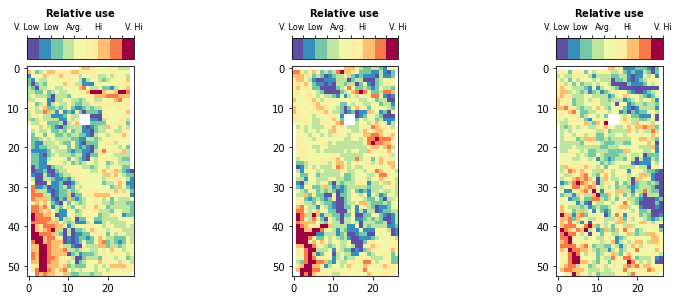

In [17]:
xr_dat_past = df_wkly_grid[df_wkly_grid['Pasture'] == '15E'].groupby(['Year', 'season_str',
                                                                        'UTM_Y', 'UTM_X']).mean().to_xarray()
rel_use_breaks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
rel_use_labels = ['V. Low', '', 'Low', '', 'Avg.', '', 'Hi', '', '', 'V. Hi']
rel_use_cmap = cm.get_cmap('Spectral_r', len(rel_use_breaks))
res_use_patches =[mpatches.Patch(color=rel_use_cmap(i), 
                                   label=rel_use_labels[i]) for i in np.arange(len(rel_use_labels))]
# Create the colormap
cmap_rel_use = colors.LinearSegmentedColormap.from_list(
            'Relative use', [rel_use_cmap(i) for i in np.arange(len(rel_use_labels))],
    N=len(rel_use_labels))
norm_rel_use = colors.BoundaryNorm(rel_use_breaks, len(rel_use_breaks))

yr = 2016
xr_dat_early = xr_dat_past.sel(Year=yr, season_str='early')
xr_dat_mid = xr_dat_past.sel(Year=yr, season_str='mid')
xr_dat_late = xr_dat_past.sel(Year=yr, season_str='late')

cax_fsize=8
cax_title_fsize=10
cax_pad=0.10

fig = plt.figure(figsize=(14, 10))

gs1 = GridSpec(1, 3, top=0.98, bottom=0.65, wspace=0.05)
ax1 = fig.add_subplot(gs1[0])
ax2 = fig.add_subplot(gs1[1])
ax3 = fig.add_subplot(gs1[2])
im1 = ax1.imshow(xr_dat_early['pred_rel_bins'].sortby('UTM_Y', ascending=False).data, 
                 cmap=cmap_rel_use, norm=norm_rel_use)
divider1 = make_axes_locatable(ax1)
cax1 = divider1.append_axes('top', size='10%', pad=cax_pad)
cbar1 = fig.colorbar(im1, cax=cax1, orientation='horizontal')
cax1.xaxis.set_ticks_position('top')
cax1.set_title("$\\bf{Relative\ use}$", fontsize=10)
cbar1.ax.tick_params(labelsize=8)
cbar1.ax.set_xticklabels(rel_use_labels)

im2 = ax2.imshow(xr_dat_mid['pred_rel_bins'].sortby('UTM_Y', ascending=False).data, 
                 cmap=cmap_rel_use, norm=norm_rel_use)
divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes('top', size='10%', pad=cax_pad)
cbar2 = fig.colorbar(im2, cax=cax2, orientation='horizontal')
cax2.xaxis.set_ticks_position('top')
cax2.set_title("$\\bf{Relative\ use}$", fontsize=10)
cbar2.ax.tick_params(labelsize=8)
cbar2.ax.set_xticklabels(rel_use_labels)

im3 = ax3.imshow(xr_dat_late['pred_rel_bins'].sortby('UTM_Y', ascending=False).data, 
                 cmap=cmap_rel_use, norm=norm_rel_use)
divider3 = make_axes_locatable(ax3)
cax3 = divider3.append_axes('top', size='10%', pad=cax_pad)
cbar3 = fig.colorbar(im3, cax=cax3, orientation='horizontal')
cax3.xaxis.set_ticks_position('top')
cax3.set_title("$\\bf{Relative\ use}$", fontsize=10)
cbar3.ax.tick_params(labelsize=8)
cbar3.ax.set_xticklabels(rel_use_labels)